In [1]:
import pandas as pd
import calendar
import hvplot.pandas
import numpy as np
from sqlalchemy import create_engine
from pathlib import Path
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi

%matplotlib inline


In [2]:
median_days_on_the_market =  Path("median_days_on_market.csv")
days_on_market_df = pd.read_csv(median_days_on_the_market)
days_on_market_df = days_on_market_df.set_index("DATE")
days_on_market_df = days_on_market_df.rename(columns={"MEDDAYONMARUS": "Median Days on the Market"})

days_on_market_df

,Median Days on the Market
DATE,
2017-03-01,62.0
2017-04-01,58.0
2017-05-01,55.0
2017-06-01,56.0
2017-07-01,59.0
...,...
2023-01-01,72.0
2023-02-01,65.0
2023-03-01,52.0


In [3]:
days_on_market_df.index = pd.to_datetime(days_on_market_df.index)

start_date = pd.to_datetime("2017-03-01")
end_date = pd.to_datetime("2020-03-01")

days_on_market_before_c19 = days_on_market_df.loc[(days_on_market_df.index >= start_date) & (days_on_market_df.index <= end_date)]
days_on_market_before_c19

,Median Days on the Market
DATE,
2017-03-01,62.0
2017-04-01,58.0
2017-05-01,55.0
2017-06-01,56.0
2017-07-01,59.0
2017-08-01,61.0
2017-09-01,64.0
2017-10-01,68.0
2017-11-01,71.0


In [4]:
days_on_market_before_c19.hvplot(kind="bar", title = "The Median number of Days a house stays on the market in the United States (Pre-Pandemic)",
                        rot =45,
                        width=1200, 
                         height=600,
                        hover_color = "green")

:Bars   [DATE]   (Median Days on the Market)

In [5]:
start_date = pd.to_datetime("2020-03-01")
end_date = pd.to_datetime("2021-03-01")

days_on_market_during_c19 = days_on_market_df.loc[(days_on_market_df.index >= start_date) & (days_on_market_df.index <= end_date)]
days_on_market_during_c19

,Median Days on the Market
DATE,
2020-03-01,57.0
2020-04-01,60.0
2020-05-01,68.0
2020-06-01,62.0
2020-07-01,53.0
2020-08-01,51.0
2020-09-01,50.0
2020-10-01,51.0
2020-11-01,54.0


In [6]:
days_on_market_during_c19.hvplot(kind="bar", title = "The Median number of Days a house stays on the market in the United States (During the Pandemic)",
                        rot =45,
                        width=1200, 
                         height=600,
                        hover_color = "orange")

:Bars   [DATE]   (Median Days on the Market)

In [7]:
start_date = pd.to_datetime("2021-03-01")
end_date = pd.to_datetime("2023-05-01")

days_on_market_post_c19 = days_on_market_df.loc[(days_on_market_df.index >= start_date) & (days_on_market_df.index <= end_date)]
days_on_market_post_c19

,Median Days on the Market
DATE,
2021-03-01,45.0
2021-04-01,37.0
2021-05-01,35.0
2021-06-01,33.0
2021-07-01,35.0
2021-08-01,37.0
2021-09-01,40.0
2021-10-01,43.0
2021-11-01,46.0


In [8]:
days_on_market_post_c19.hvplot(kind="bar", title = "The Median number of Days a house stays on the market in the United States (Post-Pandemic)",
                        rot =45,
                        width=1200, 
                         height=600,
                        hover_color = "green")

:Bars   [DATE]   (Median Days on the Market)

In [9]:
days_on_market_df.hvplot(kind="line", title = "The Median number of Days a house stays on the market in the United States",
                        rot =45,
                        width=1200, 
                         height=600,
                        hover_color = "purple",
                        line_width = 5)

:Curve   [DATE]   (Median Days on the Market)

In [10]:
mean_days = days_on_market_df['Median Days on the Market'].mean()
std_days = days_on_market_df['Median Days on the Market'].std()

num_simulations = 964

# Define the forecast period
start_date = pd.to_datetime('2023-07-12')
end_date = pd.to_datetime('2026-03-01')
forecast_period = pd.date_range(start=start_date, end=end_date, freq='D')

# Perform Monte Carlo simulation and forecast
simulation_results = []
for _ in range(num_simulations):
    random_days = np.random.normal(mean_days, std_days, len(forecast_period))
    simulation_results.append(random_days)

# Analyze the simulation results
forecast_df = pd.DataFrame(simulation_results, index=forecast_period)
mean_duration_forecast = forecast_df.mean(axis=0)
std_duration_forecast = forecast_df.std(axis=0)

# Print the forecast results
print("Monte Carlo Simulation Forecast Results:")
print("Forecast Start Date:", start_date)
print("Forecast End Date:", end_date)
print("Mean Duration:")
print(mean_duration_forecast)
print("Standard Deviation of Duration:")
print(std_duration_forecast)


Monte Carlo Simulation Forecast Results:
Forecast Start Date: 2023-07-12 00:00:00
Forecast End Date: 2026-03-01 00:00:00
Mean Duration:
0      56.043952
1      55.591988
2      55.042672
3      55.879851
4      56.214370
         ...    
959    54.951528
960    55.659524
961    55.694847
962    55.670088
963    55.259090
Length: 964, dtype: float64
Standard Deviation of Duration:
0      13.525820
1      12.772865
2      13.383813
3      13.424004
4      13.550521
         ...    
959    12.807483
960    13.511668
961    13.067371
962    13.166600
963    12.713383
Length: 964, dtype: float64


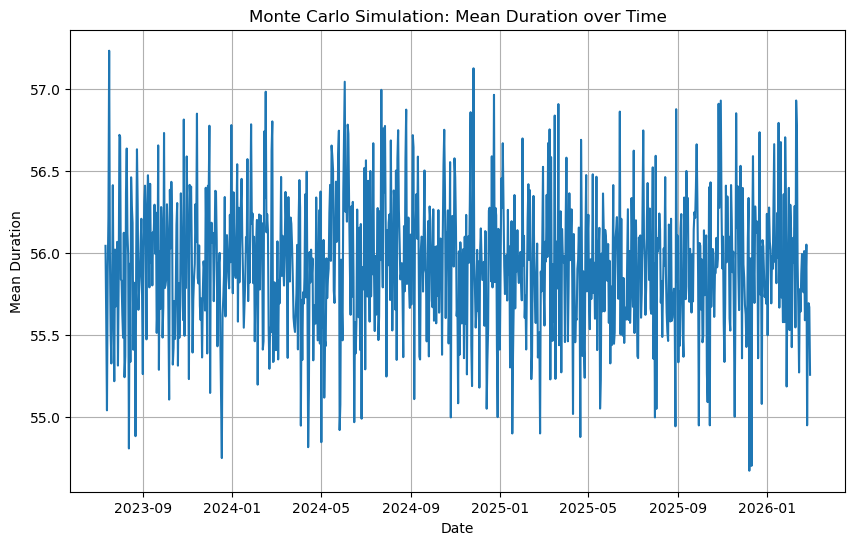

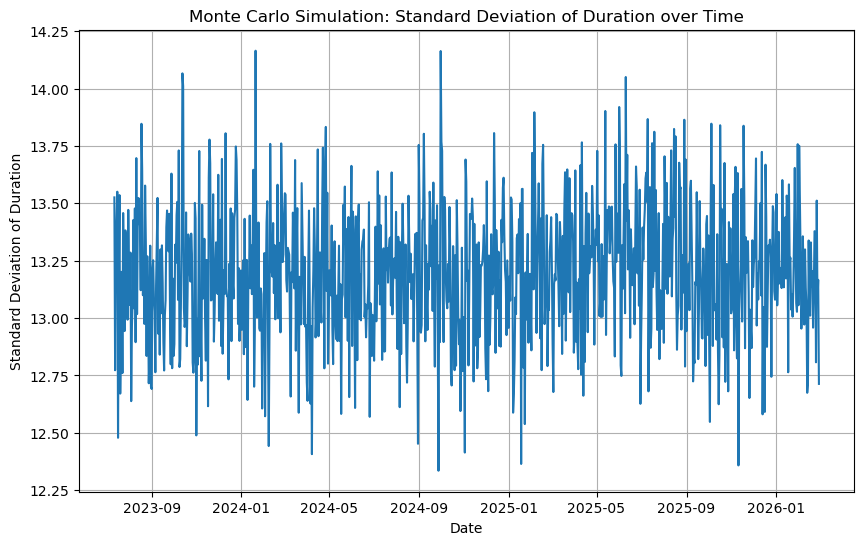

In [11]:
# Plot the mean duration over time
plt.figure(figsize=(10, 6))
plt.plot(forecast_period, mean_duration_forecast)
plt.xlabel("Date")
plt.ylabel("Mean Duration")
plt.title("Monte Carlo Simulation: Mean Duration over Time")
plt.grid(True)
plt.show()

# Plot the standard deviation of duration over time
plt.figure(figsize=(10, 6))
plt.plot(forecast_period, std_duration_forecast)
plt.xlabel("Date")
plt.ylabel("Standard Deviation of Duration")
plt.title("Monte Carlo Simulation: Standard Deviation of Duration over Time")
plt.grid(True)
plt.show()


In [12]:
# Sources: 
# https://fred.stlouisfed.org/series/MEDDAYONMARUS "Housing Inventory: Median Days on Market in the United States"

# https://www.realtor.com/advice/buy/what-does-days-on-market-mean-how-can-buyers-take-advantage/ "What Does ‘Days on Market’ Mean?
# How Buyers Can Take Advantage"

# https://www.zillow.com/research/zillow-days-on-market-5777/ "Days on Market, the Long and the Short of it"

# https://realestate.usnews.com/real-estate/articles/why-days-on-market-is-a-key-metric-when-selling-a-house "Why 'Days on Market'
# is a Key Metric When Selling a House"

# https://www.realtor.com/research/may-2022-data "May 2022 Monthly Housing Market Trends Report"

# May 2022 Monthly Housing Market Trends Report "rockethomes.com/real-estate-trends/nc/charlotte?utm_source=rocketmortgage&utm_medium=blog&utm_
# campaign=ph-public-rh&utm_term=organic-published&utm_content=blog-trends-inline&rvid=2b954716-6a7e-4a48-977c-63bbb619110a&rvidDomain=rocketmortgage.com"

#  https://www.redfin.com/news/data-center/ " Redfin Weekly Housing Market Data"